In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow.keras import optimizers

In [2]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
y_train = 0.5 * x_train + 1.0 + 0.4 * np.random.rand(len(x_train))
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

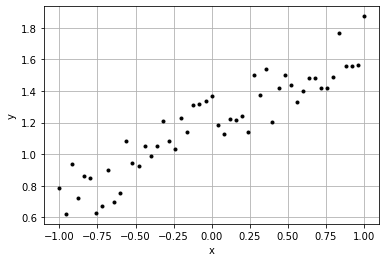

In [3]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.ones([1,1])) # 기울기
        self.b = tf.Variable(tf.ones([1])) # y 절편

    def call(self, x): # x: 데이터 x 좌표
        return tf.matmul(x, self.w) + self.b

In [5]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

## 8.2 결정론적 방법과 스토캐스틱 방법
 8.2 결정론적 방법과 스토캐스틱 방법
### 8.2.1 결정론적 방법

In [6]:
for epoch in range(MaxEpoch):
    with tf.GradientTape() as tape:
        curr_loss = loss(y_train, model(x_train))
        gradients = tape.gradient(curr_loss, model.trainable_variables)
        if epoch % 5 == 0:
            print(model.w.numpy(), model.b.numpy(), curr_loss.numpy())
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[1.]] [1.] 0.14998725
[[0.6727577]] [1.1888978] 0.02819105
[[0.54642326]] [1.1948009] 0.01566262
[[0.49765092]] [1.1949854] 0.013800872
[[0.478822]] [1.1949911] 0.013523399


In [7]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

model.compile(optimizer=optimizer, loss=loss)
history = model.fit(x_train, y_train, epochs=MaxEpoch, batch_size=len(x_train), verbose=0)
history.history['loss']

[0.14998726546764374,
 0.09028665721416473,
 0.06184689328074455,
 0.04550136253237724,
 0.03510357812047005,
 0.028191061690449715,
 0.023515479639172554,
 0.020332353189587593,
 0.01816008985042572,
 0.016676370054483414,
 0.01566261798143387,
 0.014969893731176853,
 0.014496508985757828,
 0.014173014089465141,
 0.013951944187283516,
 0.013800871558487415,
 0.013697629794478416,
 0.013627078384160995,
 0.013578863814473152,
 0.013545915484428406,
 0.013523398898541927,
 0.01350801158696413,
 0.013497496023774147,
 0.013490310870110989,
 0.013485399074852467]

In [8]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
optimizer = optimizers.SGD(lr)
loss = tf.keras.losses.mean_squared_error

model.compile(optimizer=optimizer, loss=loss)
history = model.fit(x_train, y_train, epochs=MaxEpoch, batch_size=len(x_train), verbose=0)
history.history['loss']

[0.14998725056648254,
 0.09028666466474533,
 0.06184689328074455,
 0.04550136253237724,
 0.035103581845760345,
 0.028191061690449715,
 0.023515481501817703,
 0.020332353189587593,
 0.01816008985042572,
 0.016676370054483414,
 0.01566261798143387,
 0.014969893731176853,
 0.014496508985757828,
 0.01417301595211029,
 0.013951943255960941,
 0.013800871558487415,
 0.013697631657123566,
 0.013627076521515846,
 0.013578863814473152,
 0.013545915484428406,
 0.013523398898541927,
 0.01350801158696413,
 0.013497496023774147,
 0.013490310870110989,
 0.013485399074852467]

In [9]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
optimizer = optimizers.SGD(lr)

model.compile(optimizer=optimizer, loss='mse')
history = model.fit(x_train, y_train, epochs=MaxEpoch, batch_size=len(x_train), verbose=0)
history.history['loss']

[0.14998726546764374,
 0.09028666466474533,
 0.06184689328074455,
 0.04550136253237724,
 0.03510357812047005,
 0.028191061690449715,
 0.023515481501817703,
 0.020332351326942444,
 0.01816008985042572,
 0.016676370054483414,
 0.015662619844079018,
 0.014969893731176853,
 0.014496508985757828,
 0.014173014089465141,
 0.013951944187283516,
 0.013800869695842266,
 0.013697629794478416,
 0.013627078384160995,
 0.013578863814473152,
 0.013545915484428406,
 0.013523398898541927,
 0.01350801158696413,
 0.013497496023774147,
 0.013490310870110989,
 0.013485399074852467]

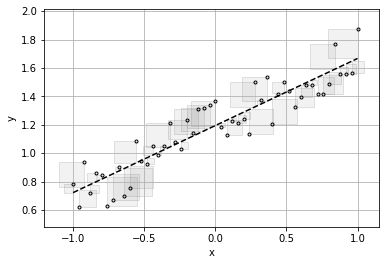

In [10]:
from matplotlib.patches import Rectangle
def visualize_l2(w, b, features, x_train, y_train):
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, np.matmul(features, w) + b, '--k')
    currentAxis = plt.gca()
    for ff, xx,yy in zip(features, x_train, y_train):
        error = np.matmul(ff, w) + b - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')

visualize_l2(model.w.numpy(), model.b.numpy(), x_train, x_train, y_train)

### 8.2.2 스토캐스틱 방법

In [11]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = x_train[shuffled_id]
shuffled_y_train = y_train[shuffled_id]

In [12]:
model = MyModel()
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

# 스토캐스틱 방법
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

batch_size = 5
for epoch in range(MaxEpoch):

    if epoch % 5 == 0:
        curr_loss = loss(y_train, model(x_train))
        print(model.w.numpy(), model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[1.]] [1.] 0.14998725
[[0.4888436]] [1.1834033] 0.0137747675
[[0.48882985]] [1.1833994] 0.013774647
[[0.48882985]] [1.1833994] 0.013774647
[[0.48882985]] [1.1833994] 0.013774647


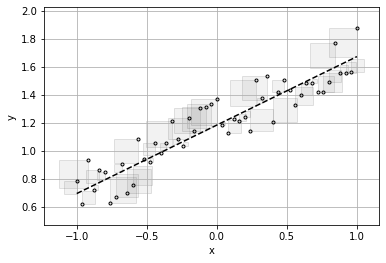

In [13]:
visualize_l2(model.w.numpy(), model.b.numpy(), x_train, x_train, y_train)

In [14]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
optimizer = optimizers.SGD(lr)

model.compile(optimizer=optimizer, loss='mse')
history = model.fit(shuffled_x_train, shuffled_y_train, epochs=MaxEpoch, batch_size=batch_size, shuffle=False, verbose=0)
history.history['loss']

[0.05571221187710762,
 0.017391953617334366,
 0.016676409170031548,
 0.01662428304553032,
 0.01661829650402069,
 0.01661754585802555,
 0.01661745272576809,
 0.016617439687252045,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597,
 0.016617434099316597]

In [15]:
print(model.w.numpy(), model.b.numpy(), loss(y_train, model(x_train)).numpy())


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[0.48882985]] [1.1833994] 0.013774647


In [16]:
print(model.w.numpy(), model.b.numpy(), loss(y_train, model(x_train)).numpy())

[[0.48882985]] [1.1833994] 0.013774647


## 8.3 비선형회귀 모델
### 8.3.2 삼차 곡선 데이터

In [17]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**2 + 0.25 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

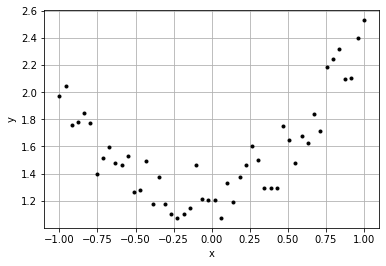

In [18]:
# 분포도
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
# 특성값 정의
features = np.array([[xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [20]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.ones([2,1])) # 기울기
        self.b = tf.Variable(tf.ones([1])) # y 절편

    def call(self, x): # x: 데이터 x 좌표
        return tf.matmul(x, self.w) + self.b

In [21]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
batch_size = 10
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

In [22]:
# 스토캐스틱 방법
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

for epoch in range(MaxEpoch):
    if epoch % 5 == 0:
        curr_loss = loss(labels, model(features))
        print(model.w.numpy().T, model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[1. 1.]] [1.] 0.27033687
[[1.076062   0.23619145]] [1.1704177] 0.01800622
[[1.0612648  0.23138306]] [1.1769375] 0.017824525
[[1.0563606  0.23150262]] [1.1790168] 0.01777821
[[1.0547771  0.23155314]] [1.1796877] 0.017764315


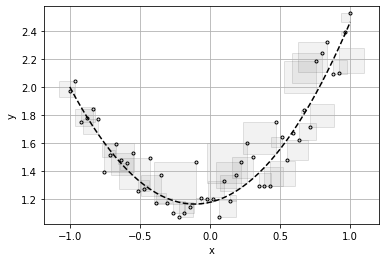

In [23]:
visualize_l2(model.w.numpy(), model.b.numpy(), features, x_train, labels)

### 8.3.2 삼차 곡선 데이터

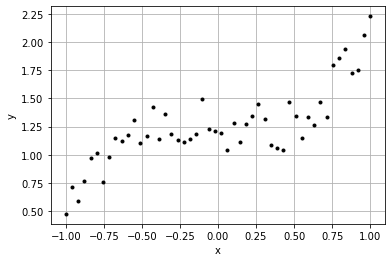

In [24]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2  -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
# 특성값 정의
features = np.array([[xval**3, xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [26]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.ones([3,1])) # 기울기
        self.b = tf.Variable(tf.ones([1])) # y 절편

    def call(self, x): # x: 데이터 x 좌표
        return tf.matmul(x, self.w) + self.b

In [27]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
batch_size = 10
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

In [28]:
# 스토캐스틱 방법
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

for epoch in range(MaxEpoch):
    if epoch % 5 == 0:
        curr_loss = loss(labels, model(features))
        print(model.w.numpy().T, model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[1. 1. 1.]] [1.] 0.5701468
[[0.57525814 0.42941988 0.10803684]] [1.0714246] 0.03189389
[[0.6731134  0.24562356 0.04974759]] [1.1476407] 0.021883728
[[0.7469721  0.18626073 0.00303175]] [1.1714399] 0.019629693
[[ 0.8040568   0.16686103 -0.03414325]] [1.1785893] 0.018755484


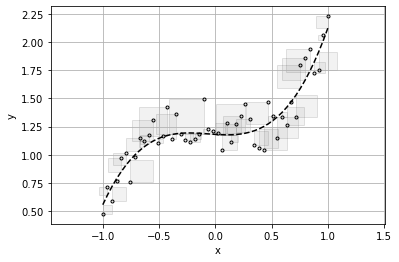

In [29]:
visualize_l2(model.w.numpy(), model.b.numpy(), features, x_train, labels)

### 8.3.3 삼각함수 곡선 데이터

In [30]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = 0.25 * np.cos(np.pi * x_train) + 0.3 * np.sin(np.pi * x_train) + 0.2 * (2 * np.random.rand(len(x_train)) - 1)

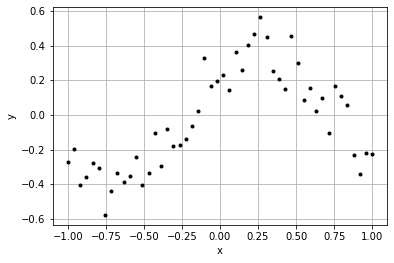

In [31]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [32]:
# 특성값 정의
features = np.array([[np.cos(np.pi * xval), np.sin(np.pi * xval)] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [33]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.ones([2,1])) # 기울기
        self.b = tf.Variable(tf.ones([1])) # y 절편

    def call(self, x): # x: 데이터 x 좌표
        return tf.matmul(x, self.w) + self.b

In [34]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 25
lr = 0.25
batch_size = 10
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

In [35]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
for epoch in range(MaxEpoch):
    if epoch % 5 == 0:
        curr_loss = loss(labels, model(features))
        print(model.w.numpy().T, model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[1. 1.]] [1.] 1.5639328
[[0.23110393 0.2858727 ]] [-0.0394818] 0.011384334
[[0.23096298 0.28525737]] [-0.0394916] 0.011390009
[[0.23096305 0.28525692]] [-0.03949159] 0.011390013
[[0.23096305 0.28525692]] [-0.03949159] 0.011390013


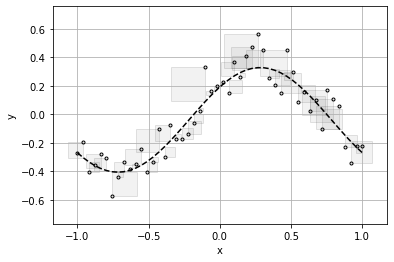

In [36]:
visualize_l2(model.w.numpy(), model.b.numpy(), features, x_train, labels)

In [37]:
# 특성값 정의
features = np.array([[xval**4, xval**3, xval**2, xval] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [38]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(tf.ones([4,1])) # 기울기
        self.b = tf.Variable(tf.ones([1])) # y 절편

    def call(self, x): # x: 데이터 x 좌표
        return tf.matmul(x, self.w) + self.b

In [39]:
# 예측 모델 설정
model = MyModel()

# 수치최적화 알고리즘 설정
MaxEpoch = 50
lr = 0.5
batch_size = 10
optimizer = optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

In [40]:
# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

# 스토캐스틱 방법
for epoch in range(MaxEpoch):
    if epoch % 5 == 0:
        curr_loss = loss(labels, model(features))
        print(model.w.numpy().T, model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[1. 1. 1. 1.]] [1.] 3.8419268
[[-0.05147387 -0.0441815  -0.3918626   0.26385254]] [0.0820013] 0.03404133
[[ 0.0171144  -0.34243575 -0.46151006  0.46705392]] [0.10662895] 0.022222478
[[ 0.08249484 -0.52345115 -0.5177213   0.58903474]] [0.11978491] 0.017594868
[[ 0.13976319 -0.63290304 -0.5684435   0.66236544]] [0.1295983] 0.015582387
[[ 0.19043499 -0.6991668  -0.6144026   0.70639104]] [0.13729417] 0.014590031
[[ 0.23565818 -0.7393685  -0.65609133  0.7327666 ]] [0.14355287] 0.01402134
[[ 0.27626032 -0.76

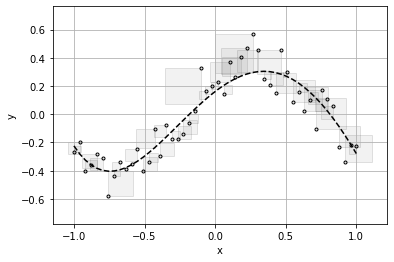

In [41]:
visualize_l2(model.w.numpy(), model.b.numpy(), features, x_train, labels)